In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

### LOADING WITH OS 

Before we create a model we need data, if data is not stored in a file how can we create it?

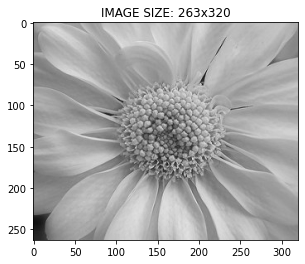

In [2]:
#for this example we are going to load a flowere data set 
data_path=r"C:\Users\Eduardo\Documents\datasets\flowers"
categories = ["daisy","dandelion","rose","sunflower","tulip"]

for category in categories:                 # iteration in each category
    path = os.path.join(data_path,category) # path to each folder catefory
    for img in os.listdir(path):
        img_matrix = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_matrix, cmap="gray")
        plt.title('IMAGE SIZE: {}x{}'.format(img_matrix.shape[0],img_matrix.shape[1]))
        plt.show()
        break
    break


### RESIZING

One of the biggest probles we might face is that photos have differente sizes, in order to solve that lets use  cv2.resize. just keep in mind that if the size is to low the image might not me recognaizable

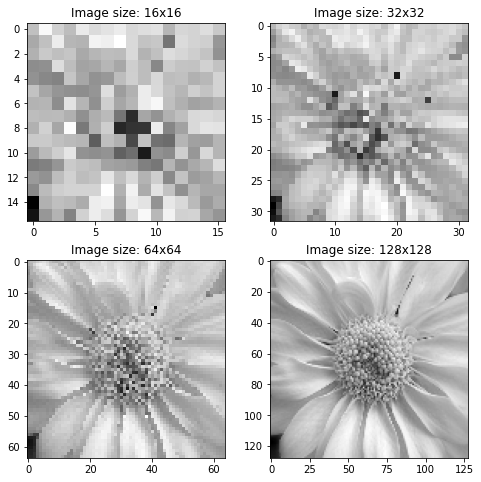

In [3]:
IMG_SIZE = [16,32,64,128]
plt.figure(figsize=(8, 8))
for i, n in enumerate(IMG_SIZE):
    plt.subplot(2, 2, i+1)
    plt.title('Image size: {}x{}'.format(n,n))
    new_matrix = cv2.resize(img_matrix,(n,n))
    plt.imshow(new_matrix,cmap="gray")
plt.show()

### LOADING DATA

 Now that we understand the basics lets create a function

In [89]:
data =[]
def create_data(IMG_SIZE):
    data_path=r"C:\Users\Eduardo\Documents\datasets\flowers"
    categories = ["daisy","dandelion","rose","sunflower","tulip"]

    for category in categories:                 # iteration in each category
        path = os.path.join(data_path,category) # path to each folder catefory
        class_num=np.zeros((len(categories),1))
        class_num[ categories.index(category)] = 1
        
        for img in os.listdir(path):
            try:
                img_matrix = cv2.imread(os.path.join(path,img))
                new_matrix = cv2.resize(img_matrix,(IMG_SIZE,IMG_SIZE))
                data.append([new_matrix, class_num])
            except Exception as e:
                pass

create_data(100)

LETS SHUFFLE THE DATA

In [100]:
import random
random.shuffle(data)

LETS SPLIT THE DATA IN X $\epsilon $ (M,S,S,N) and y  $\epsilon $  (M,C)  <br> M =data size ,  S = pixel size ,  N = chanels , C = classes


In [123]:
X = []
y = []
for features , label in  data:
    X.append(features)
    y.append(label)

A LIST BY ITSELF WOULD BE USLESS. IT IS BETTER TO WORK WITH NUMPY ARRAYS

In [124]:
X = np.array(X)
X = X.reshape(-1,100,100,3) # IMG_SIZE = 100

In [127]:
y = np.array(y)
y = y.reshape(-1,5) # categories = 5 (we implemented one hot encoding)

LETS SEE IF WE ARENGED OUR DATA CORRECTLY

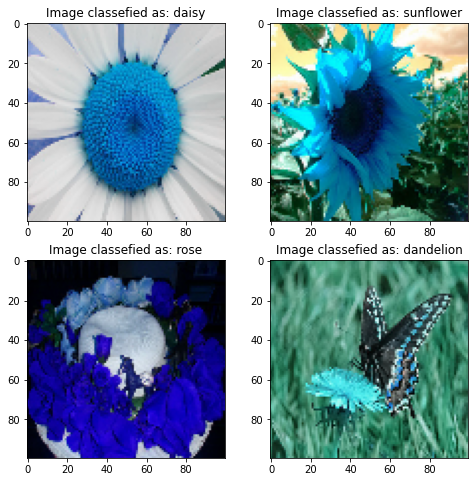

In [180]:
categories = ["daisy","dandelion","rose","sunflower","tulip"]
randomList = random.sample(range(0, X.shape[0]), 4)

plt.figure(figsize=(8, 8))

for i, n in enumerate(randomList):
    ica = np.argmax(y[n])
    plt.subplot(2, 2, i+1)
    plt.title('Image classefied as: {}'.format(categories[ica]))
    plt.imshow(X[n])


###  Saving data with pickle

it would be a waste of time to re run this notebook everytime you want to train your model.so It is a good idea to save the data 

In [186]:
#lets change the path wit os first (to save file in data sets directory)
os.chdir(r'C:\Users\Eduardo\Documents\datasets\flowers\10_proced_data')
print(os.getcwd()) #lets make sure we are in the correct directory

C:\Users\Eduardo\Documents\datasets\flowers\10_proced_data


In [189]:
import pickle

pickle_out = open("X.pickle","wb") #Opens or creates a file.pickle (write mode)
pickle.dump(X,pickle_out)          #Stores data
pickle_out.close()                 #Closes w mode

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

reading the data

In [192]:
pickle_in = open("X.pickle","rb")  # using reading bits
X  = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")  # using reading bits
y  = pickle.load(pickle_in)

In [194]:
X.shape

(4323, 100, 100, 3)

In [195]:
y.shape

(4323, 5)

###### Biblography
[Loading data](https://www.youtube.com/watch?v=j-3vuBynnOE&t=696s) <br>
[OS Module](https://www.youtube.com/watch?v=tJxcKyFMTGo)